# Main Imports

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from matplotlib.ticker import MultipleLocator
import re
import os

# import data
cb_5x = os.path.join("..", "clean-files-ul", "aggr", "agg-cb-5.csv")
cf_5x = os.path.join("..", "clean-files-ul", "aggr", "agg-cb-5-5.csv")

# Calculations for every file

#### 5x Scenarios

In [8]:
def read_data_by_ue(csv_path): 
  df = pd.read_csv(csv_path)

  dfs = {}

  for ue_id, group in df.groupby("UE_ID"):
    df_ue = group.sort_values("Time_ms").reset_index(drop=True)
    df_ue["Rolling Avg (Mbps)"] = df_ue["Mean_Throughput"].rolling(window=5, min_periods=1).mean()
    dfs[ue_id] = df_ue
  
  return dfs

dfs_cb_5 = read_data_by_ue(cb_5x)
dfs_cf_5 = read_data_by_ue(cf_5x)

# Behavior Graphics 

## 5X Scenarios

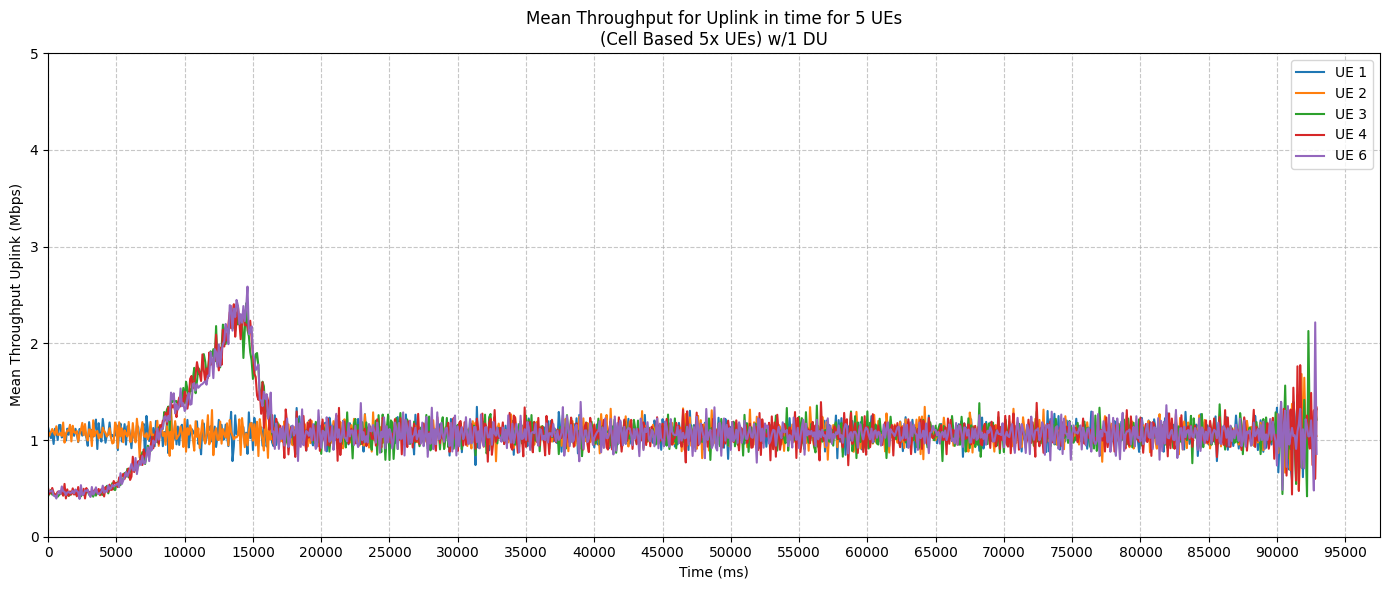

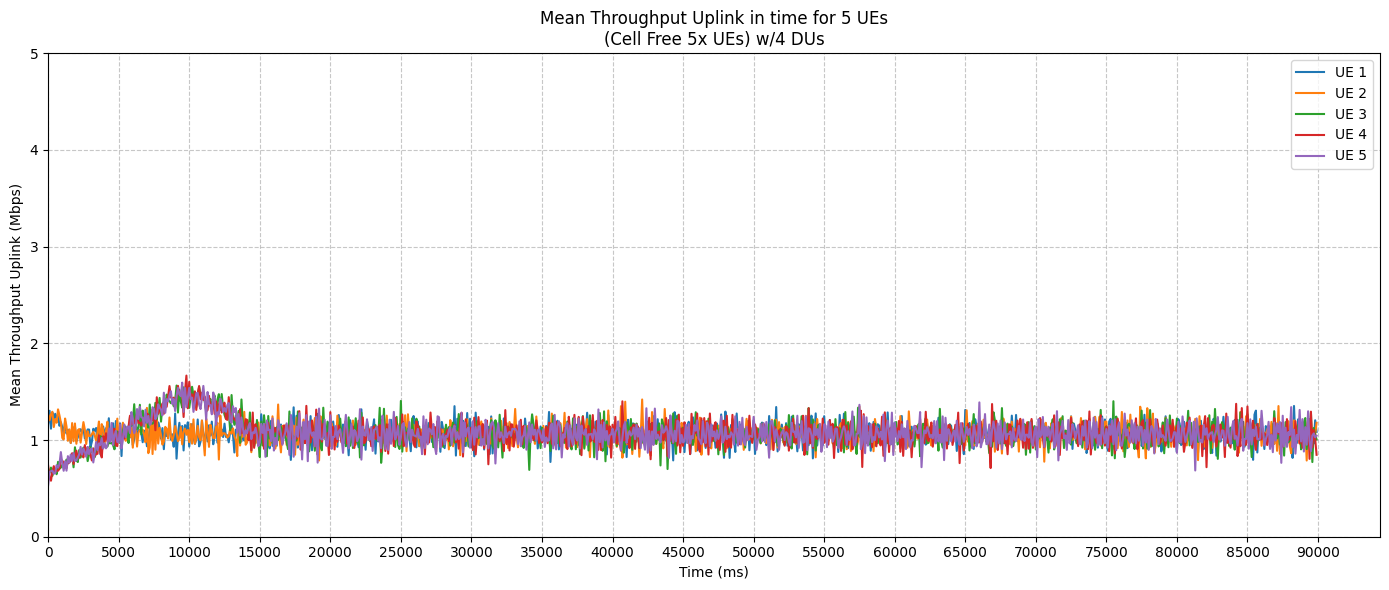

In [14]:
plt.figure(figsize=(14, 6))

# Graphic of Throughput and Rolling Average
for ue, df in dfs_cb_5.items():
    dfs_cb_5[ue]["Mean_Throughput"] = dfs_cb_5[ue]["Mean_Throughput"].round(3)

    sns.lineplot(x="Time_ms", y="Mean_Throughput", data=df, label=f"UE {ue}")

plt.title("Mean Throughput for Uplink in time for 5 UEs\n(Cell Based 5x UEs) w/1 DU")
plt.xlabel("Time (ms)")
plt.ylabel("Mean Throughput Uplink (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 5)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 6))

# Graphic of Throughput and Rolling Average
for ue, df in dfs_cf_5.items():
    dfs_cf_5[ue]["Mean_Throughput"] = dfs_cf_5[ue]["Mean_Throughput"].round(3)

    sns.lineplot(x="Time_ms", y="Mean_Throughput", data=df, label=f"UE {ue}")

plt.title("Mean Throughput Uplink in time for 5 UEs\n(Cell Free 5x UEs) w/4 DUs")
plt.xlabel("Time (ms)")
plt.ylabel("Mean Throughput Uplink (Mbps)")
plt.grid(True)
plt.legend()

plt.ylim(0, 5)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [5]:
df_cb_5 = pd.read_csv(cb_5x)
df_cf_5 = pd.read_csv(cf_5x)

print(df_cb_5["Mean_Throughput"].describe())
print(df_cf_5["Mean_Throughput"].describe())

count    4650.000000
mean        1.070289
std         0.233903
min         0.391193
25%         0.982282
50%         1.060701
75%         1.138828
max         2.586306
Name: Mean_Throughput, dtype: float64
count    4500.000000
mean        1.070281
std         0.199278
min         0.238453
25%         0.936074
50%         1.065482
75%         1.192440
max         1.857663
Name: Mean_Throughput, dtype: float64


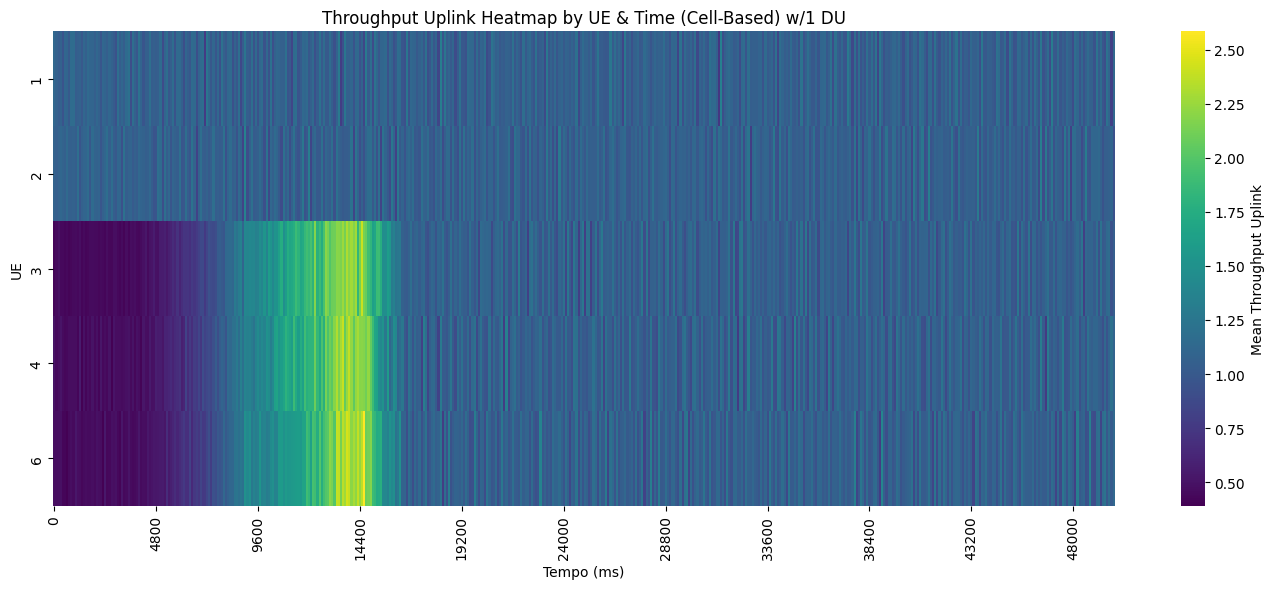

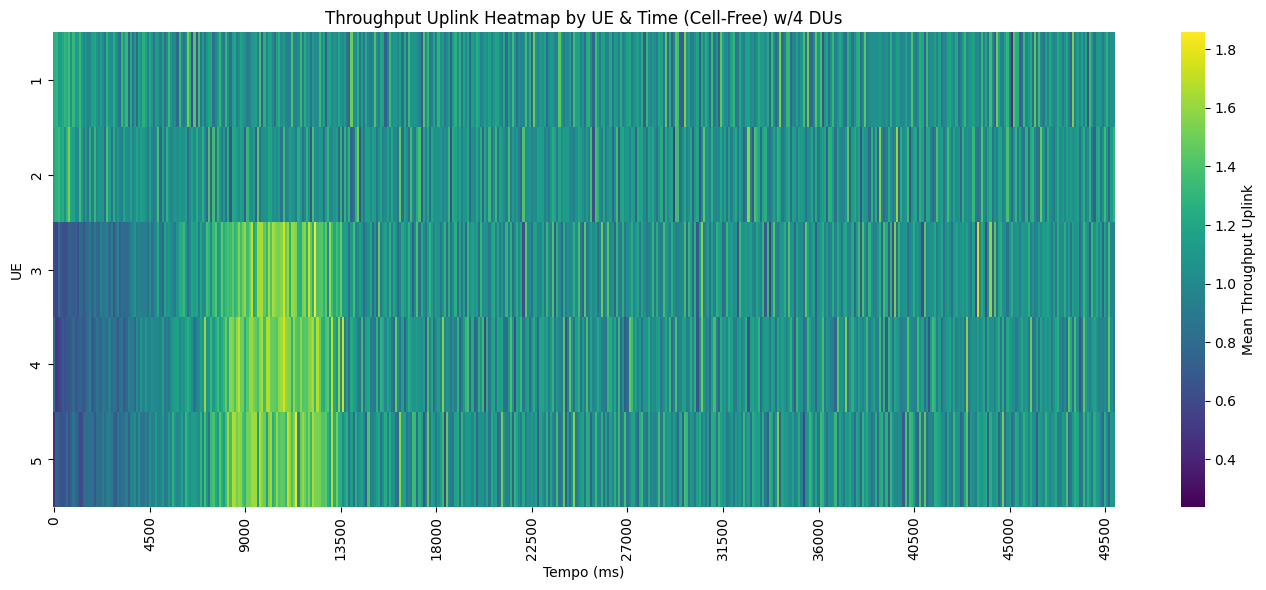

In [15]:
heat_cb = df_cb_5.pivot(index="UE_ID", columns="Time_ms", values="Mean_Throughput")
heat_cf = df_cf_5.pivot(index="UE_ID", columns="Time_ms", values="Mean_Throughput")

# Plot Cell-Based
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cb, cmap="viridis", cbar_kws={'label': 'Mean Throughput Uplink'})
plt.title("Throughput Uplink Heatmap by UE & Time (Cell-Based) w/1 DU")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.tight_layout()
plt.xlim(0,500)
plt.show()

# Plot Cell-Free
plt.figure(figsize=(14, 6))
sns.heatmap(heat_cf, cmap="viridis", cbar_kws={'label': 'Mean Throughput Uplink'})
plt.title("Throughput Uplink Heatmap by UE & Time (Cell-Free) w/4 DUs")
plt.xlabel("Tempo (ms)")
plt.locator_params(axis="x", nbins=20)
plt.ylabel("UE")
plt.xlim(0,500)
plt.tight_layout()
plt.show()

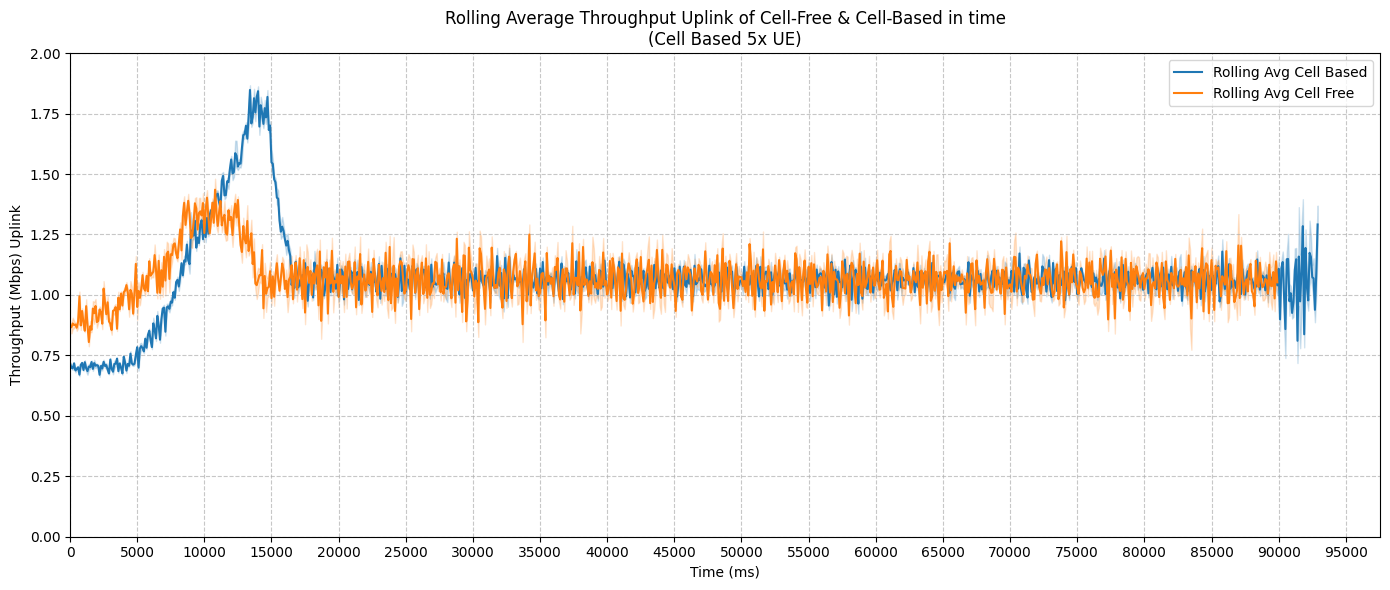

In [13]:
# Round of throughput values to 3 decimal places
df_cb_5["Mean_Throughput"] = df_cb_5["Mean_Throughput"].round(3)
# Calculate rolling average with a window of 5
df_cb_5["Rolling Avg (Mbps)"] = df_cb_5["Mean_Throughput"].rolling(window=5).mean()

# Round of throughput values to 3 decimal places
df_cf_5["Mean_Throughput"] = df_cf_5["Mean_Throughput"].round(3)
# Calculate rolling average with a window of 5
df_cf_5["Rolling Avg (Mbps)"] = df_cf_5["Mean_Throughput"].rolling(window=5).mean()

# Graphic of Throughput and Rolling Average
plt.figure(figsize=(14, 6))
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cb_5, label="Rolling Avg Cell Based")
sns.lineplot(x="Time_ms", y="Rolling Avg (Mbps)", data=df_cf_5, label="Rolling Avg Cell Free")
plt.title("Rolling Average Throughput Uplink of Cell-Free & Cell-Based in time\n(Cell Based 5x UE)")
plt.xlabel("Time (ms)")
plt.ylabel("Throughput (Mbps) Uplink")
plt.legend()

plt.grid(True)
plt.ylim(0, 2)
plt.xlim(left=0)
plt.gca().xaxis.set_major_locator(MultipleLocator(5000))
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()